# Analysis: Community Position Identity Profile

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
import seaborn
import pandas as pd
import numpy as np
# Treemap
import squarify

In [2]:
pd.set_option('display.max_columns', None) # Display all the columns

# Set seaborn style
seaborn.set_style("whitegrid")
seaborn.set_context("poster")

# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"

In [3]:
first_person_color = '#fa824c'
second_person_color = '#00bdbf'
third_person_color = '#f3f1e9'

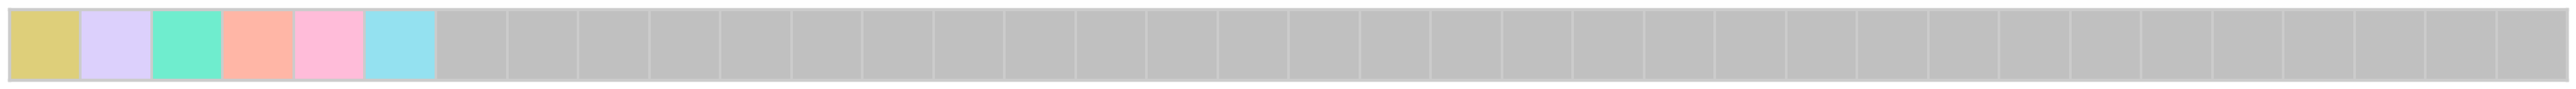

In [4]:
# Palette of modularity classes from Gephi
gephi_palette = ["#decf7a", "#dcd0fc", "#6fedce", "#ffb6a6", "#ffbcd9", "#94e1f0",         
                 "#c0c0c0", "#c0c0c0", "#c0c0c0", "#c0c0c0", "#c0c0c0", "#c0c0c0", "#c0c0c0", "#c0c0c0", "#c0c0c0", "#c0c0c0", 
                 "#c0c0c0", "#c0c0c0", "#c0c0c0", "#c0c0c0", "#c0c0c0", "#c0c0c0", "#c0c0c0", "#c0c0c0", "#c0c0c0", "#c0c0c0", 
                 "#c0c0c0", "#c0c0c0", "#c0c0c0", "#c0c0c0", "#c0c0c0", "#c0c0c0", "#c0c0c0", "#c0c0c0", "#c0c0c0", "#c0c0c0", ]
seaborn.set_palette(palette=gephi_palette)
seaborn.palplot(gephi_palette)

In [5]:
# Load graph
graph = nx.read_graphml("data/twitter.graphml")

In [6]:
data = pd.DataFrame.from_dict(dict(graph.nodes(data=True)), orient='index')

In [7]:
data.head()

,label,id_str,name,screen_name,location,description,url,entities,protected,followers_count,friends_count,listed_count,created_at,favourites_count,utc_offset,time_zone,geo_enabled,verified,statuses_count,lang,status,contributors_enabled,is_translator,is_translation_enabled,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_image_url,profile_image_url_https,profile_banner_url,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,suspended,needs_phone_verification,keyword_fablab,keyword_fab lab,keyword_makerspace,keyword_hackerspace,keyword_techshop,keyword_repaircafe,keyword_repair cafe,keyword_makerfaire,keyword_maker faire,keyword_diy-bio,keyword_diybio,keyword_diy-bio lab,keyword_diybio lab,keyword_diybiolab,keyword_hacklab,keyword_sewing cafe,keyword_sewingcafe,author,team,perspective,In-Degree,Out-Degree,Degree,Weighted In-Degree,Weighted Out-Degree,Weighted Degree,Eccentricity,Closeness Centrality,Harmonic Closeness Centrality,Betweenness Centrality,PageRank,Modularity Class,Eigenvector Centrality
12855572,openp2pdesign,12855572,Massimo Menichinelli,openp2pdesign,Barcelona,"Metadesign for Open Systems, Processes, Projec...",https://t.co/QW3NbjFmCP,{'url': {'urls': [{'url': 'https://t.co/QW3Nbj...,False,6069,5371,647,Wed Jan 30 01:12:44 +0000 2008,6786,None,None,True,False,16392,None,{'created_at': 'Wed Sep 07 10:30:11 +0000 2022...,False,False,False,9AE4E8,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,True,http://pbs.twimg.com/profile_images/1156582711...,https://pbs.twimg.com/profile_images/115658271...,https://pbs.twimg.com/profile_banners/12855572...,0084B4,BDDCAD,DDFFCC,333333,True,True,False,False,False,False,False,regular,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,first-person,211,494,705,211.0,494.0,705.0,5.0,0.480145,0.552562,205589.714043,0.002945,2,0.554466
1039422441414479872,FabLabZhengzhou,1039422441414479872,Zhengzhou MakerSpace,FabLabZhengzhou,"河南, 中华人民共和国",Official Twitter of Zhengzhou Maker Space（Fabl...,https://t.co/fxAJYKqMCC,{'url': {'urls': [{'url': 'https://t.co/fxAJYK...,False,28,189,0,Tue Sep 11 07:56:36 +0000 2018,24,None,None,True,False,14,None,{'created_at': 'Mon Aug 15 06:24:54 +0000 2022...,False,False,False,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/1390542341...,https://pbs.twimg.com/profile_images/139054234...,https://pbs.twimg.com/profile_banners/10394224...,1B95E0,000000,000000,000000,False,True,False,False,False,False,False,none,NaN,NaN,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,third-person,7,66,73,7.0,66.0,73.0,6.0,0.407197,0.439395,905.922885,0.000118,2,0.034628
1052994083688464386,fablabcaracas,1052994083688464386,Fab Lab Caracas,fablabcaracas,"Caracas, Venezuela",Primer FabLab -Laboratorio de Fabricación Digi...,https://t.co/Ke3lMnBaHA,{'url': {'urls': [{'url': 'https://t.co/Ke3lMn...,False,128,715,1,Thu Oct 18 18:45:28 +0000 2018,355,None,None,True,False,131,None,{'created_at': 'Mon Aug 08 22:16:24 +0000 2022...,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1453834747...,https://pbs.twimg.com/profile_images/145383474...,https://pbs.twimg.com/profile_banners/10529940...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,False,False,False,none,NaN,NaN,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,third-person,9,133,142,9.0,133.0,142.0,5.0,0.405699,0.445097,2145.964889,0.000125,2,0.031635
114227465,oscarvlqz,114227465,Oscar Velazquez,

In [8]:
data["Modularity Class"].describe()

count    3732.000000
mean      173.932744
std       289.749656
min         0.000000
25%         3.000000
50%        12.000000
75%       242.250000
max       911.000000
Name: Modularity Class, dtype: float64

In [9]:
mc_10 = data.groupby(['Modularity Class']).count()["id_str"].nlargest(n=10).index.to_list()

In [10]:
mc_10

[12, 2, 11, 3, 812, 4, 1, 6, 0, 65]

In [11]:
gephi_colors_dict = {}

In [12]:
for c in mc_10:
    gephi_colors_dict[c] = gephi_palette[mc_10.index(c)]

In [13]:
gephi_colors_dict

{12: '#decf7a',
 2: '#dcd0fc',
 11: '#6fedce',
 3: '#ffb6a6',
 812: '#ffbcd9',
 4: '#94e1f0',
 1: '#c0c0c0',
 6: '#c0c0c0',
 0: '#c0c0c0',
 65: '#c0c0c0'}

# Author / Individual user

In [14]:
data[data["author"] == True]

,label,id_str,name,screen_name,location,description,url,entities,protected,followers_count,friends_count,listed_count,created_at,favourites_count,utc_offset,time_zone,geo_enabled,verified,statuses_count,lang,status,contributors_enabled,is_translator,is_translation_enabled,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_image_url,profile_image_url_https,profile_banner_url,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,suspended,needs_phone_verification,keyword_fablab,keyword_fab lab,keyword_makerspace,keyword_hackerspace,keyword_techshop,keyword_repaircafe,keyword_repair cafe,keyword_makerfaire,keyword_maker faire,keyword_diy-bio,keyword_diybio,keyword_diy-bio lab,keyword_diybio lab,keyword_diybiolab,keyword_hacklab,keyword_sewing cafe,keyword_sewingcafe,author,team,perspective,In-Degree,Out-Degree,Degree,Weighted In-Degree,Weighted Out-Degree,Weighted Degree,Eccentricity,Closeness Centrality,Harmonic Closeness Centrality,Betweenness Centrality,PageRank,Modularity Class,Eigenvector Centrality
12855572,openp2pdesign,12855572,Massimo Menichinelli,openp2pdesign,Barcelona,"Metadesign for Open Systems, Processes, Projec...",https://t.co/QW3NbjFmCP,{'url': {'urls': [{'url': 'https://t.co/QW3Nbj...,False,6069,5371,647,Wed Jan 30 01:12:44 +0000 2008,6786,None,None,True,False,16392,None,{'created_at': 'Wed Sep 07 10:30:11 +0000 2022...,False,False,False,9AE4E8,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,True,http://pbs.twimg.com/profile_images/1156582711...,https://pbs.twimg.com/profile_images/115658271...,https://pbs.twimg.com/profile_banners/12855572...,0084B4,BDDCAD,DDFFCC,333333,True,True,False,False,False,False,False,regular,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,first-person,211,494,705,211.0,494.0,705.0,5.0,0.480145,0.552562,205589.714043,0.002945,2,0.554466


In [15]:
ego = [x for x,y in graph.nodes(data=True) if y['author']==True]

In [16]:
ego

['12855572']

In [17]:
# ego net of the author
hub_ego = nx.ego_graph(graph, ego[0])

In [18]:
# Number of nodes in the ego network
len(hub_ego)

495

In [19]:
ego_nodes_modularity_classes = pd.DataFrame(columns=['screen_name','Modularity Class'])

In [20]:
for n in hub_ego.nodes(data=True):
    new_row = {'screen_name': n[1]['screen_name'], 'Modularity Class': n[1]['Modularity Class']}
    ego_nodes_modularity_classes.loc[n[1]['screen_name']] = new_row

In [21]:
# Number of nodes of ego per each modularity classe they belong to
ego_nodes_modularity_classes['Modularity Class'].value_counts()

Modularity Class
2     259
12    150
3      49
11     28
4       7
1       2
Name: count, dtype: int64

In [22]:
# Values to percentages
ego_classes_percentage = ego_nodes_modularity_classes['Modularity Class'].value_counts() / ego_nodes_modularity_classes.shape[0] * 100.0
ego_classes_percentage

Modularity Class
2     52.323232
12    30.303030
3      9.898990
11     5.656566
4      1.414141
1      0.404040
Name: count, dtype: float64

<Axes: ylabel='count'>

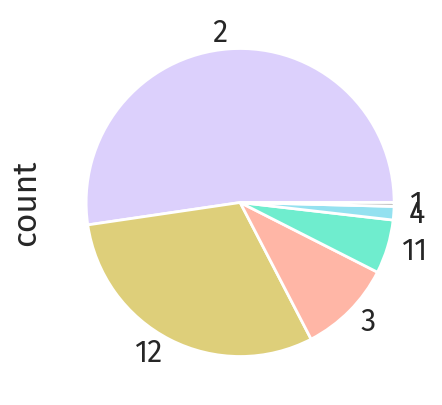

In [23]:
ego_classes_percentage.plot(kind="pie", figsize=(5,5), colors=ego_classes_percentage.index.map(gephi_colors_dict))

# Team / List of users

In [24]:
team = data[data["team"] == True]

In [25]:
egoes = [x for x,y in graph.nodes(data=True) if y['team']==True]

In [26]:
# Add author to the team, at the beginning
egoes.insert(0,ego[0])

In [27]:
# ego net of the team + author
hub_egoes = {}
for e in egoes:
    hub_egoes[e] = {'ego_network': nx.ego_graph(graph, e)}

In [28]:
for he in hub_egoes:
    hub_egoes[he]['ego_network_df'] = pd.DataFrame(columns=['screen_name','Modularity Class'])
    for k, n in enumerate(hub_egoes[he]['ego_network'].nodes()):
        df = {'screen_name': graph.nodes[n]['screen_name'], 'Modularity Class': graph.nodes[n]['Modularity Class']}
        hub_egoes[he]['ego_network_df'].loc[k] = df
        #hub_egoes[he]['ego_network_df'] = pd.concat([hub_egoes[he]['ego_network_df'], pd.DataFrame.from_dict(df, orient='columns')], ignore_index=True)

In [29]:
for he in hub_egoes:
    for n in hub_egoes[he]['ego_network'].nodes():
        df = {'screen_name': graph.nodes[n]['screen_name'], 'Modularity Class': graph.nodes[n]['Modularity Class']}
        df2 = pd.DataFrame()
        df2['Percentage'] = hub_egoes[he]['ego_network_df']['Modularity Class'].value_counts() / hub_egoes[he]['ego_network_df'].shape[0] * 100.0
        df2.index = df2.index.astype(np.int64)
        df2['Modularity Class'] = df2.index
        hub_egoes[he]['ego_classes_percentage'] = df2

In [30]:
for he in hub_egoes:
    hub_egoes[he]['screen_name'] = graph.nodes[he]['screen_name']

In [31]:
len(hub_egoes)

63

In [32]:
58 / 8

7.25

## Create the color palette

In [33]:
# Check which modularity classes are present in the team
list_of_present_classes = []
for he in hub_egoes:
    for row, col in hub_egoes[he]['ego_classes_percentage'].iterrows():
        if row not in list_of_present_classes:
            list_of_present_classes.append(row)

In [34]:
len(list_of_present_classes)

37

In [35]:
new_col = {}

for k,i in enumerate(mc_10):
    j = k +1
    new_col[i] = "C"+str("%02d" % j)

In [36]:
new_col

{12: 'C01',
 2: 'C02',
 11: 'C03',
 3: 'C04',
 812: 'C05',
 4: 'C06',
 1: 'C07',
 6: 'C08',
 0: 'C09',
 65: 'C10'}

In [37]:
new_col3 = {}
for c in data.groupby(['Modularity Class']).count()["id_str"].index.to_list():
    new_col3[c] = "#c0c0c0"

In [38]:
for c in mc_10:
    new_col3[c] = gephi_palette[mc_10.index(c)]

In [39]:
new_col2 = {}

for k,i in enumerate(list_of_present_classes):
    if i in mc_10:
        j = k +1
        new_col2[i] = "C"+str("%02d" % j)
    else:
        new_col2[i] = i

In [40]:
for k,i in enumerate(mc_10):
    j = k +1
    new_col2[i] = "C"+str("%02d" % j)

## Plot

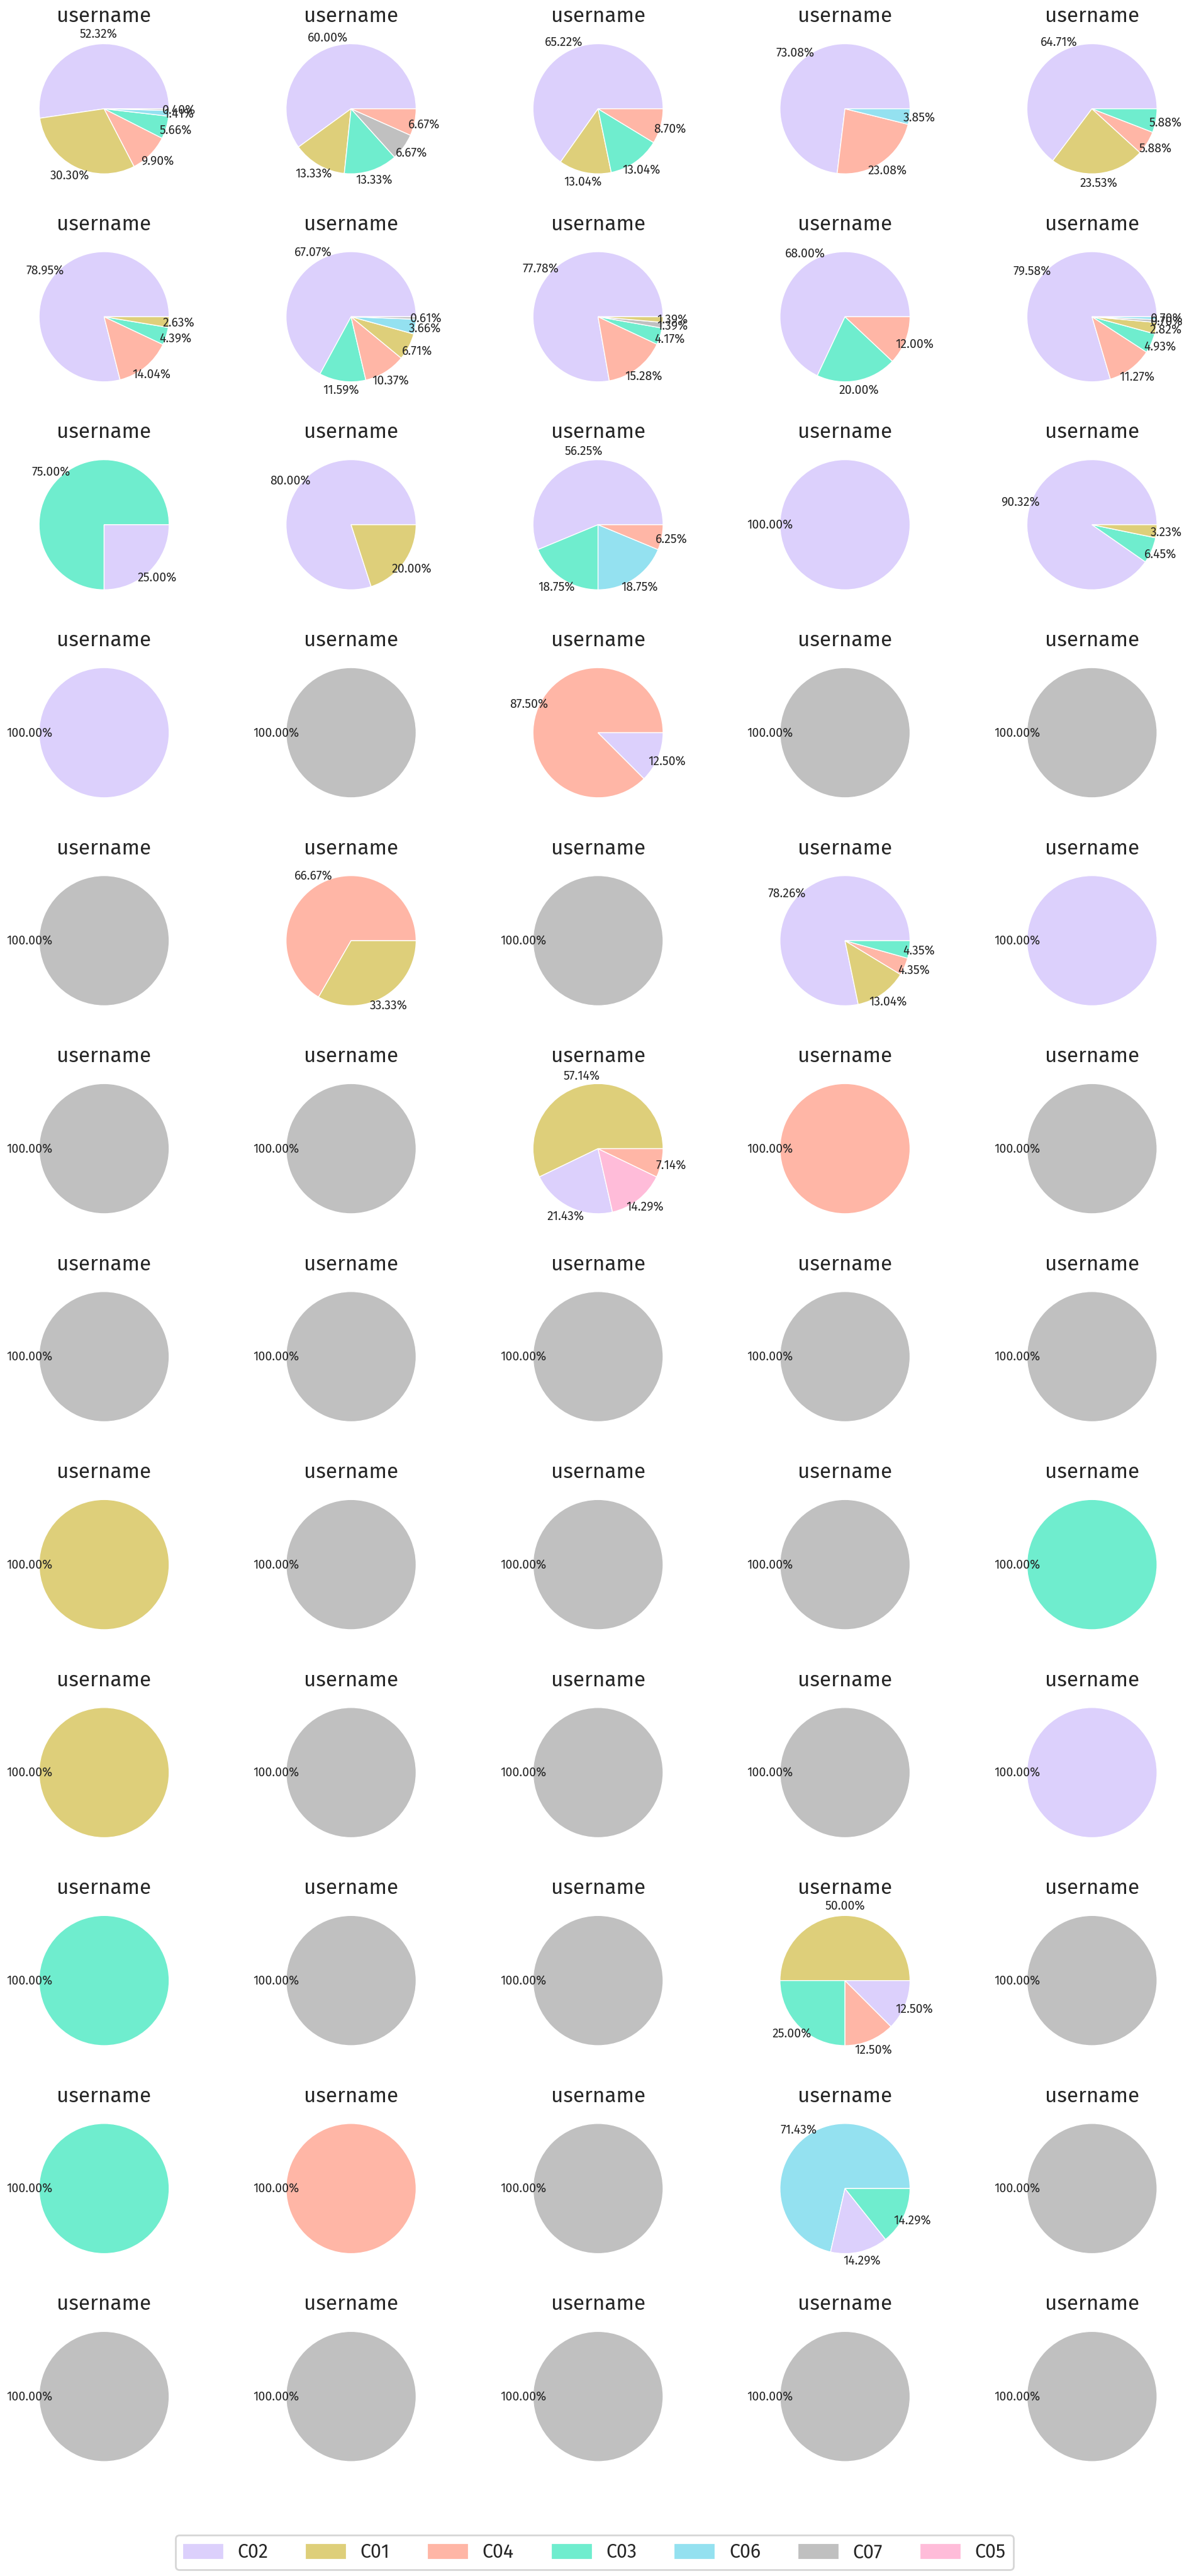

In [41]:
figure, axes = plt.subplots(12, 5, figsize=(20,40))
figure.subplots_adjust(hspace=0.5, wspace=0.8)
for idx, (he, ax) in enumerate(zip(hub_egoes, axes.flatten())):
    ax.pie(hub_egoes[he]['ego_classes_percentage']['Percentage'], wedgeprops = {'linewidth': 1}, colors=hub_egoes[he]['ego_classes_percentage']['Modularity Class'].map(new_col3), autopct='%1.2f%%', pctdistance=1.15, textprops={'fontsize': 14})
    #ax.set_title(hub_egoes[he]['screen_name']) # anonymized - uncomment this when running it
    ax.set_title("username") #comment this when running it to deanonymize
else:
    [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]

# Build the legend of present modularity classes
cp = []
for i in list_of_present_classes:
    if i in mc_10:
        cp.append(mpatches.Patch(color=new_col3[i], label=new_col2[i]))
figure.legend(handles=cp, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=10)

plt.tight_layout()
plt.savefig("png/community_position_identity_profile.png", dpi=300, bbox_inches='tight')
plt.savefig("svg/community_position_identity_profile.svg", bbox_inches='tight')

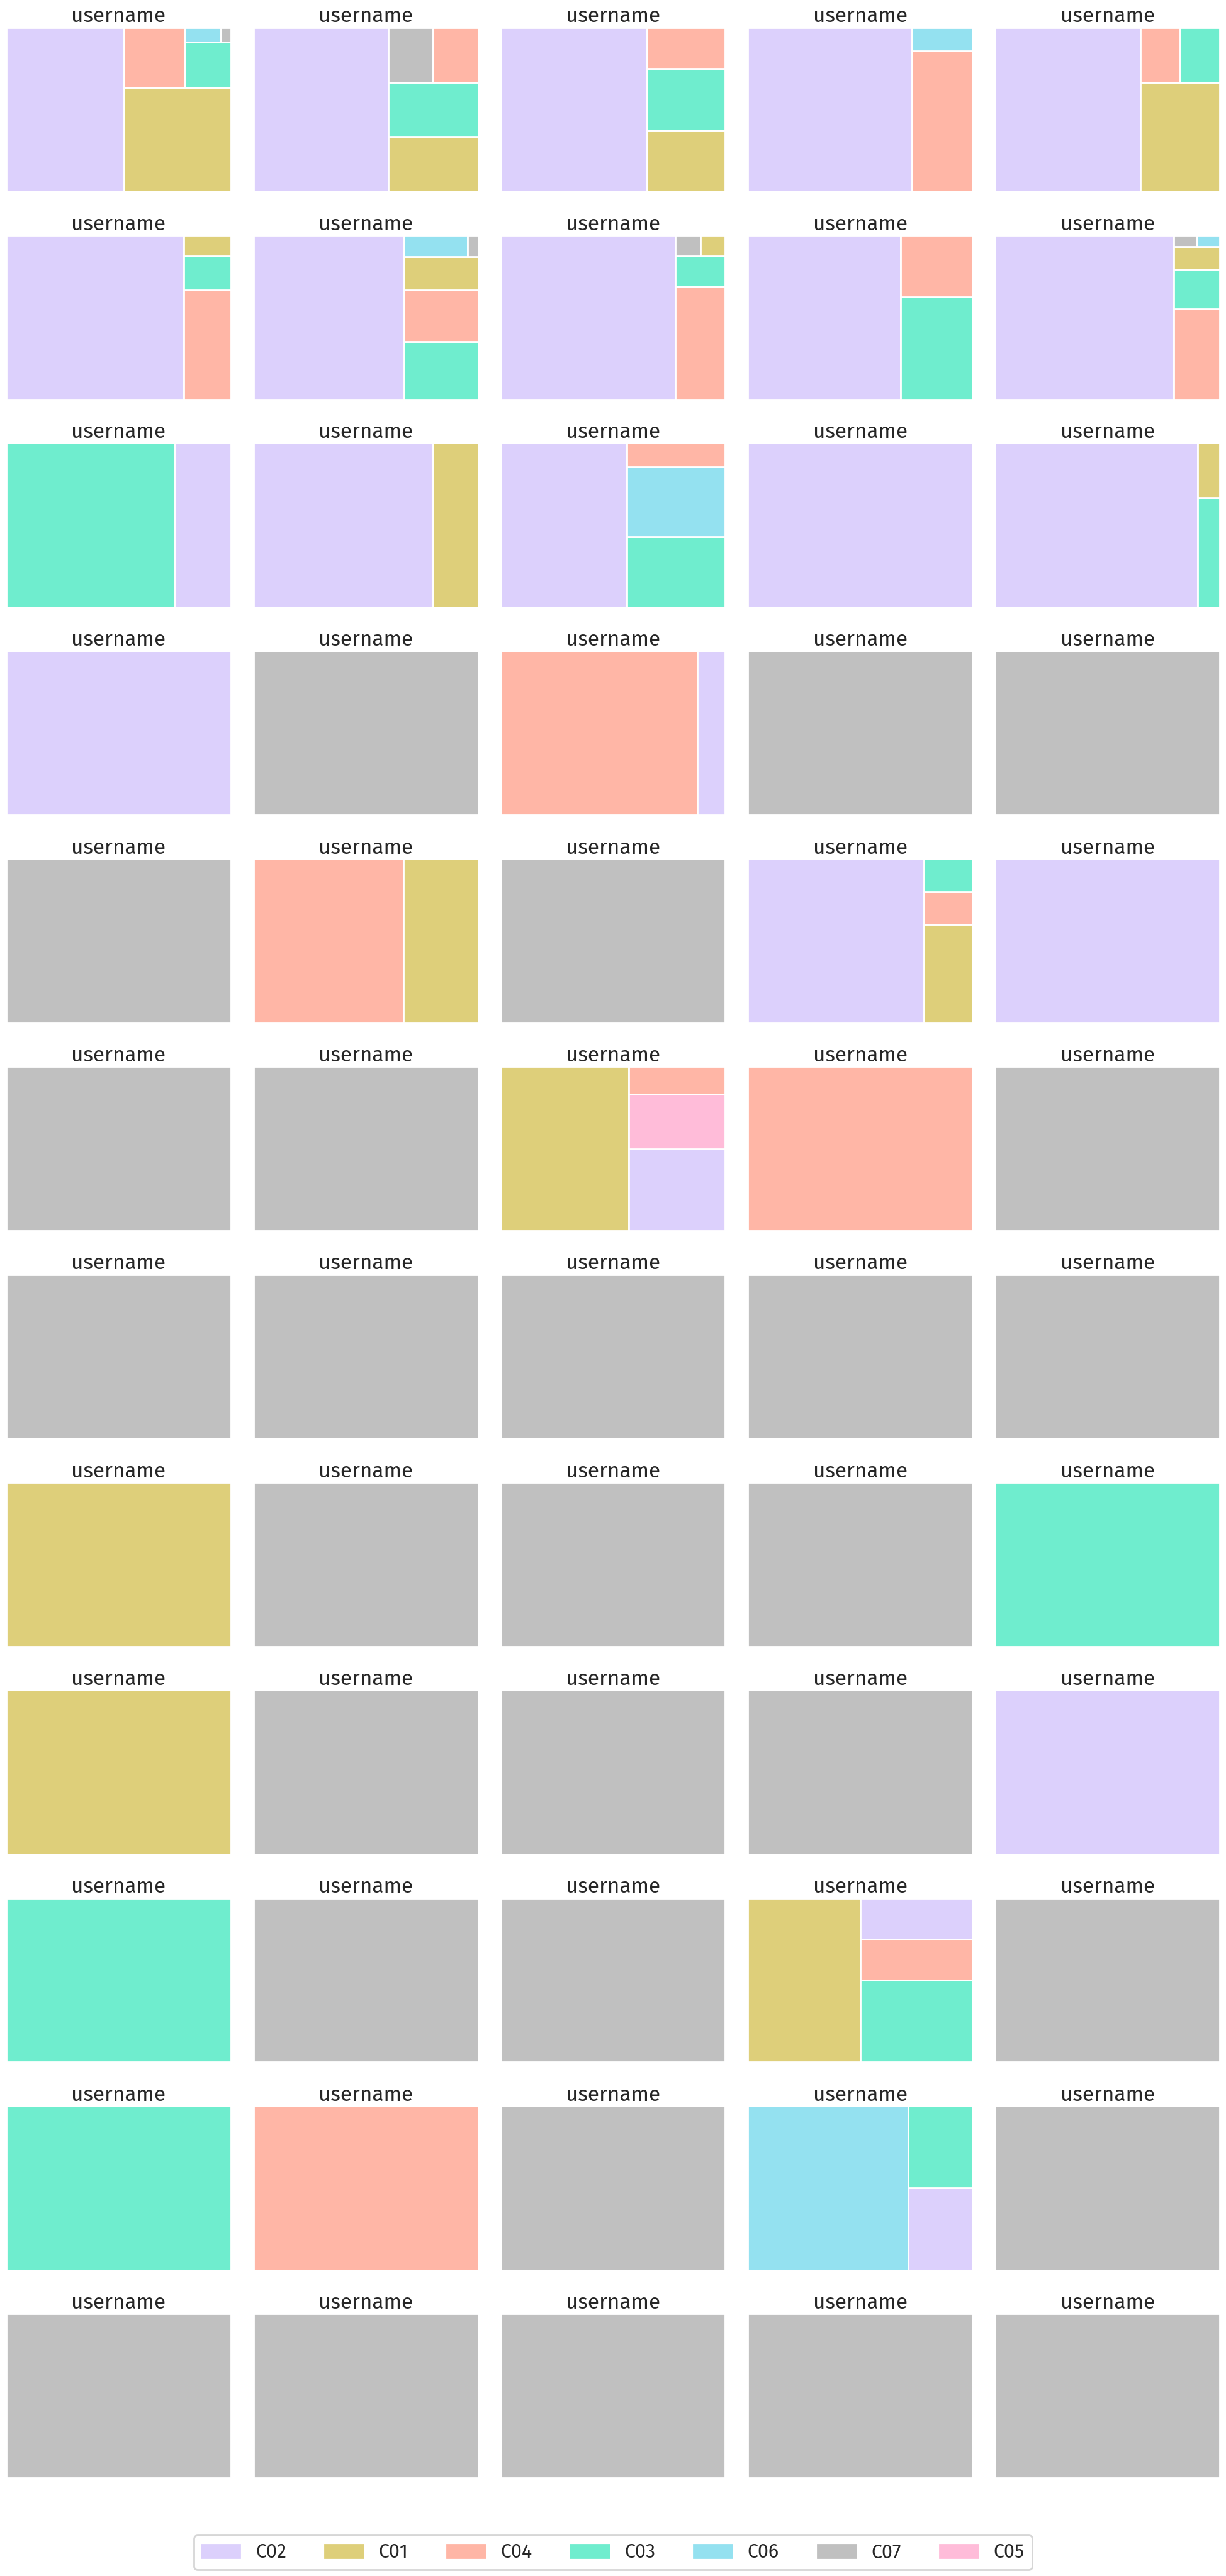

In [42]:
figure, axes = plt.subplots(12, 5, figsize=(20,40))
figure.subplots_adjust(hspace=0.5, wspace=0.8)
for idx, (he, ax) in enumerate(zip(hub_egoes, axes.flatten())):
    squarify.plot(ax=ax, sizes=hub_egoes[he]['ego_classes_percentage']['Percentage'], color=hub_egoes[he]['ego_classes_percentage']['Modularity Class'].map(new_col3))
    #ax.set_title(hub_egoes[he]['screen_name']) # anonymized - uncomment this when running it
    ax.set_title("username") #comment this when running it to deanonymize
    ax.axis('off')
else:
    [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]

# Build the legend of present modularity classes
cp = []
for i in list_of_present_classes:
    if i in mc_10:
        cp.append(mpatches.Patch(color=new_col3[i], label=new_col2[i]))
figure.legend(handles=cp, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=10)

plt.tight_layout()
plt.savefig("png/community_position_identity_profile_treemap.png", dpi=300, bbox_inches='tight')
plt.savefig("svg/community_position_identity_profile_treemap.svg", bbox_inches='tight')

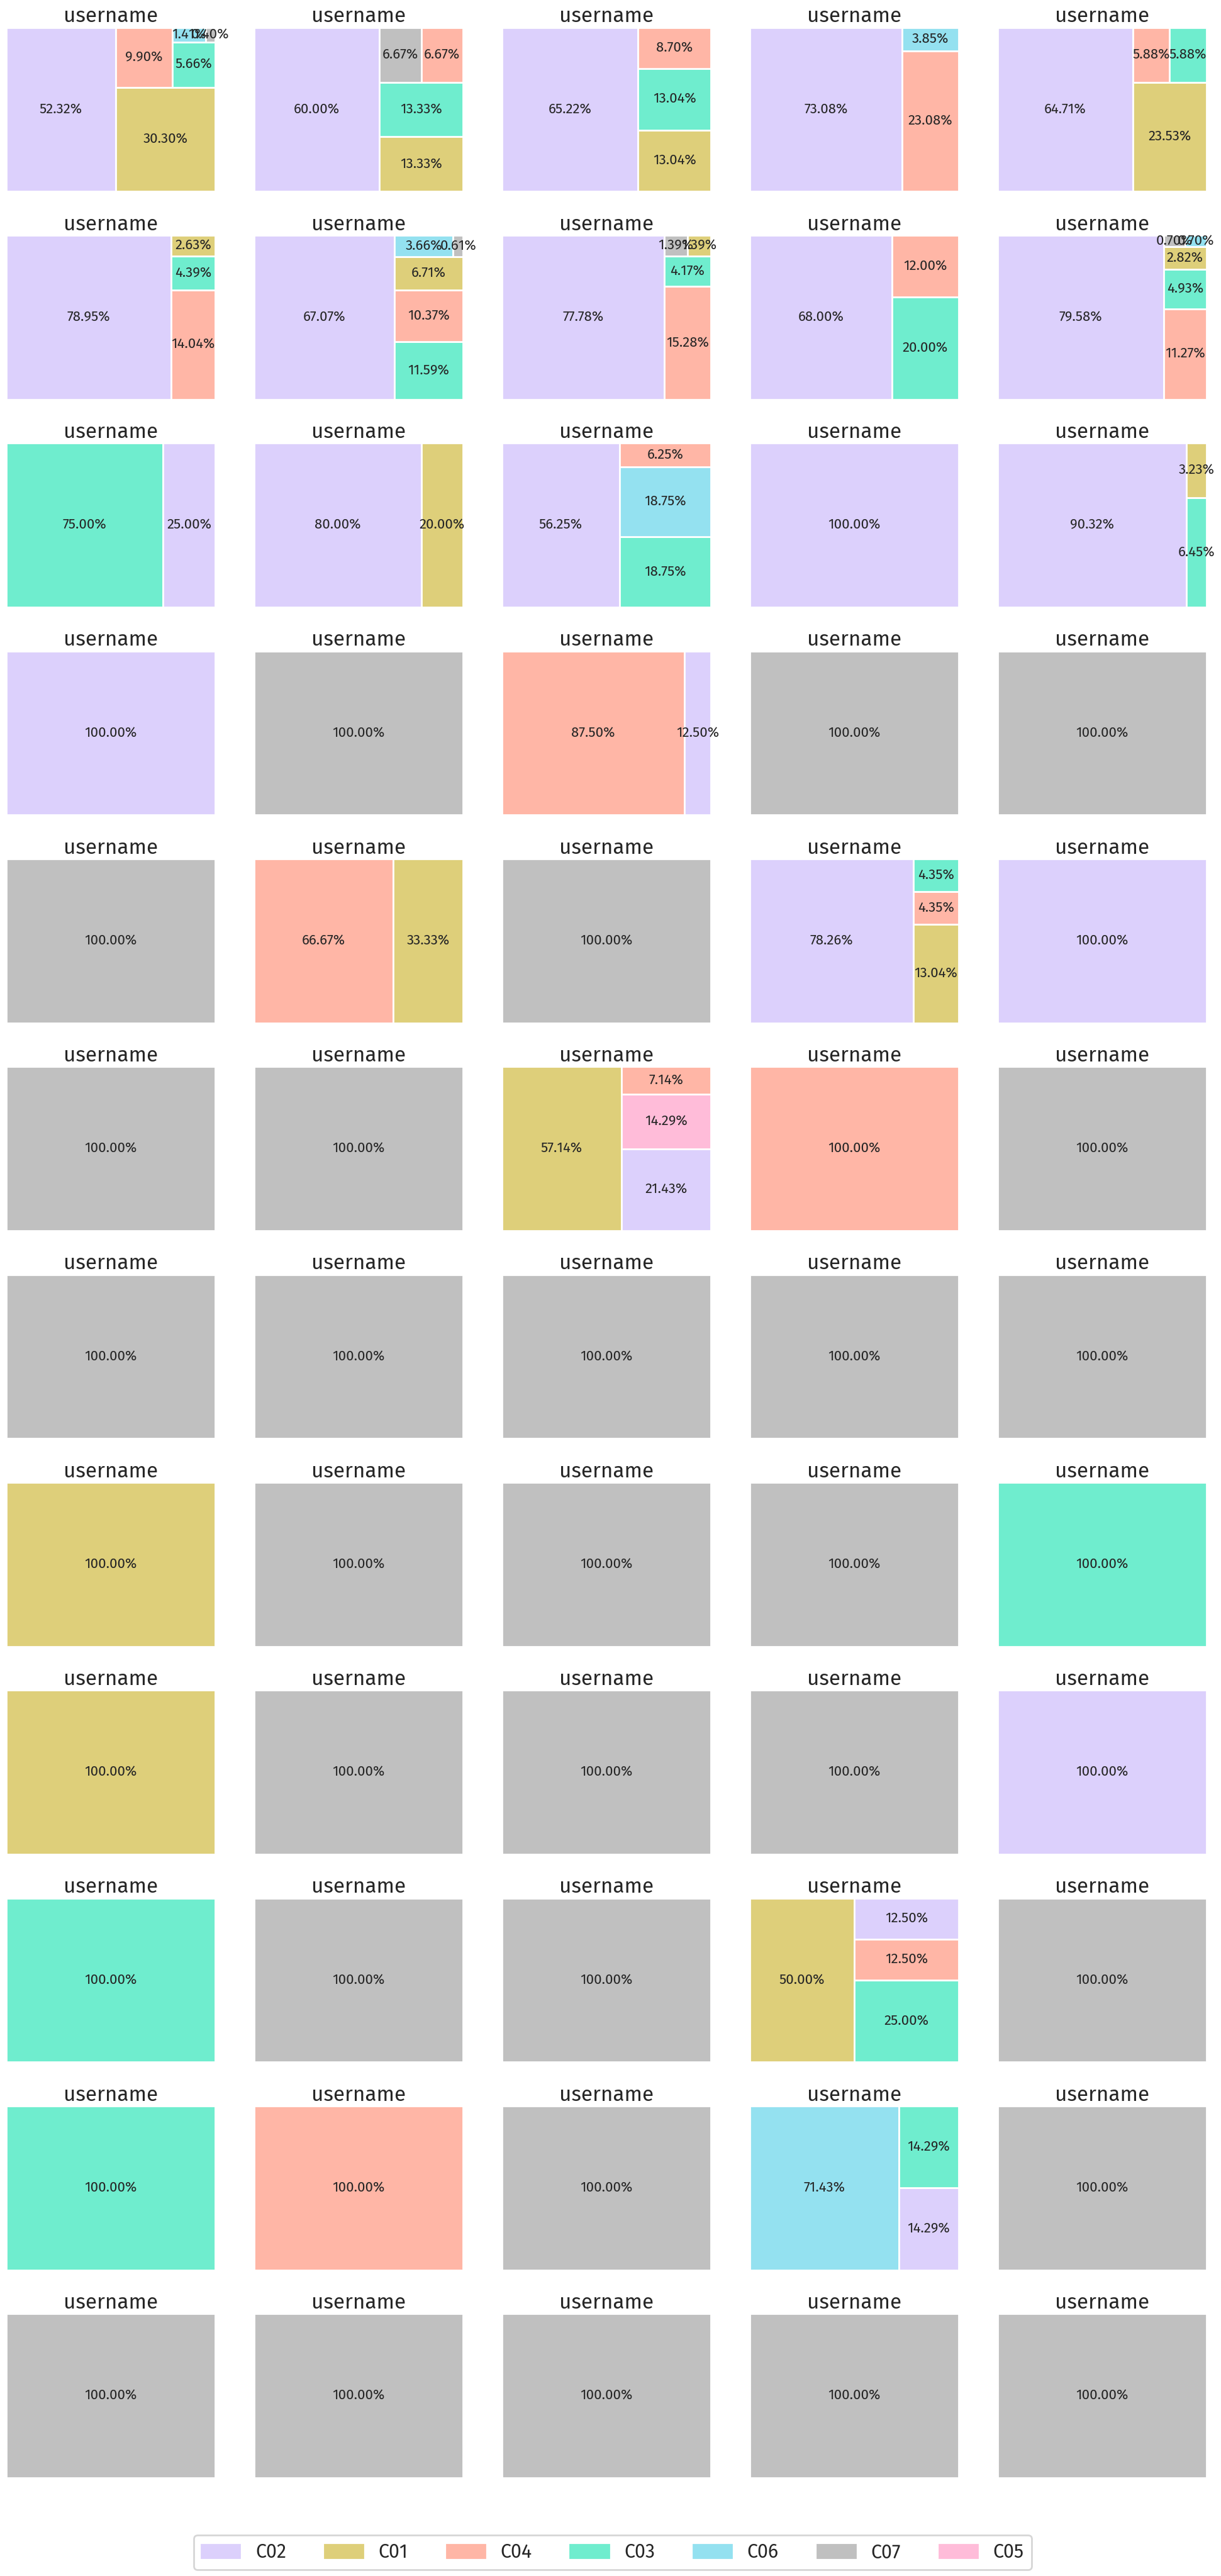

In [43]:
figure, axes = plt.subplots(12, 5, figsize=(20,40))
figure.subplots_adjust(hspace=0.5, wspace=0.8)
for idx, (he, ax) in enumerate(zip(hub_egoes, axes.flatten())):
    squarify.plot(ax=ax, sizes=hub_egoes[he]['ego_classes_percentage']['Percentage'], label=['{:.2f}%'.format(x) for x in hub_egoes[he]['ego_classes_percentage']['Percentage']], color=hub_egoes[he]['ego_classes_percentage']['Modularity Class'].map(new_col3), text_kwargs={'fontsize':16})
    #ax.set_title(hub_egoes[he]['screen_name']) # anonymized - uncomment this when running it
    ax.set_title("username") #comment this when running it to deanonymize
    ax.axis('off')
else:
    [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]

# Build the legend of present modularity classes
cp = []
for i in list_of_present_classes:
    if i in mc_10:
        cp.append(mpatches.Patch(color=new_col3[i], label=new_col2[i]))
figure.legend(handles=cp, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=10)

plt.tight_layout()
plt.savefig("png/community_position_identity_profile_label.png", dpi=300, bbox_inches='tight')
plt.savefig("svg/community_position_identity_profile_label.svg", bbox_inches='tight')

## Selection of users

In [44]:
hub_egoes.keys()

dict_keys(['12855572', '16446573', '109232964', '45764082', '137617285', '15180646', '2040691', '26866407', '182114889', '178494505', '3888491', '18477210', '26712390', '4268301675', '14425553', '2434444734', '15541060', '10471402', '1428715211721170945', '1549814628548370432', '345877680', '27451674', '198796310', '9551962', '570182542', '260749791', '46638208', '39380589', '864791401', '190127978', '59588424', '1017784009047322624', '192517113', '148307997', '1200924259', '1439741', '280614648', '517519616', '11708622', '505462576', '90817322', '329869423', '178072203', '2337857941', '3134181', '72935642', '177243567', '14353089', '14437470', '120093259', '51989656', '1301860618069258242', '15488603', '245203178', '358000882', '410691899', '22354577', '4131451', '467204510', '1402012885505687556', '81088434', '851588456300118018', '832650561291902976'])

In [45]:
len(hub_egoes)

63

In [46]:
# Add the selected users in this list
coders = ['openp2pdesign', 'fablabbcn']

coders_data = {}

for i in hub_egoes:
    if hub_egoes[i]["screen_name"] in coders:
        coders_data[hub_egoes[i]["screen_name"]] = hub_egoes[i]

In [47]:
# Example
coders_data["openp2pdesign"]["ego_classes_percentage"]["Percentage"]

Modularity Class
2     52.323232
12    30.303030
3      9.898990
11     5.656566
4      1.414141
1      0.404040
Name: Percentage, dtype: float64

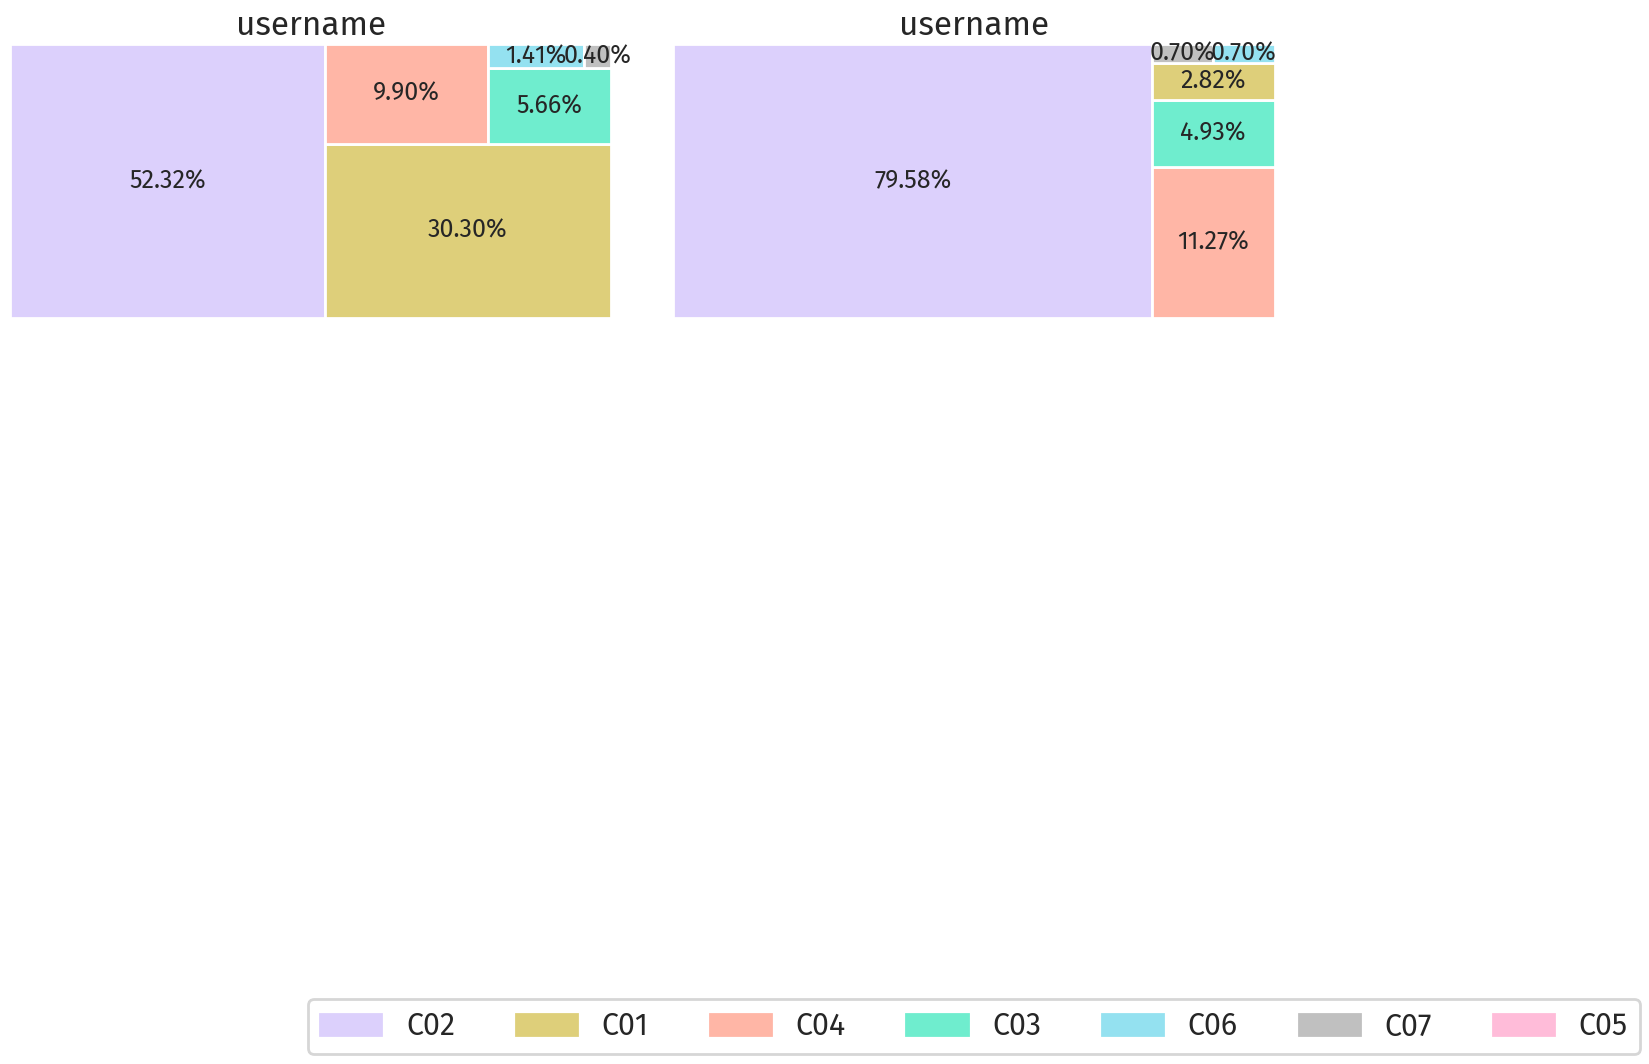

In [48]:
figure, axes = plt.subplots(3, 3, figsize=(20,10))
figure.subplots_adjust(hspace=0.5, wspace=0.8)
for idx, (he, ax) in enumerate(zip(coders_data, axes.flatten())):
    squarify.plot(ax=ax, sizes=coders_data[he]['ego_classes_percentage']['Percentage'], label=['{:.2f}%'.format(x) for x in coders_data[he]['ego_classes_percentage']['Percentage']], color=coders_data[he]['ego_classes_percentage']['Modularity Class'].map(new_col3), text_kwargs={'fontsize':18})
    #ax.set_title(hub_egoes[he]['screen_name']) # anonymized - uncomment this when running it
    ax.set_title("username") #comment this when running it to deanonymize
    ax.axis('off')
else:
    [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]

# Build the legend of present modularity classes
cp = []
for i in list_of_present_classes:
    if i in mc_10:
        cp.append(mpatches.Patch(color=new_col3[i], label=new_col2[i]))
figure.legend(handles=cp, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=10)

plt.tight_layout()
plt.savefig("png/community_position_identity_profile_label_9.png", dpi=300, bbox_inches='tight')
plt.savefig("svg/community_position_identity_profile_label_9.svg", bbox_inches='tight')

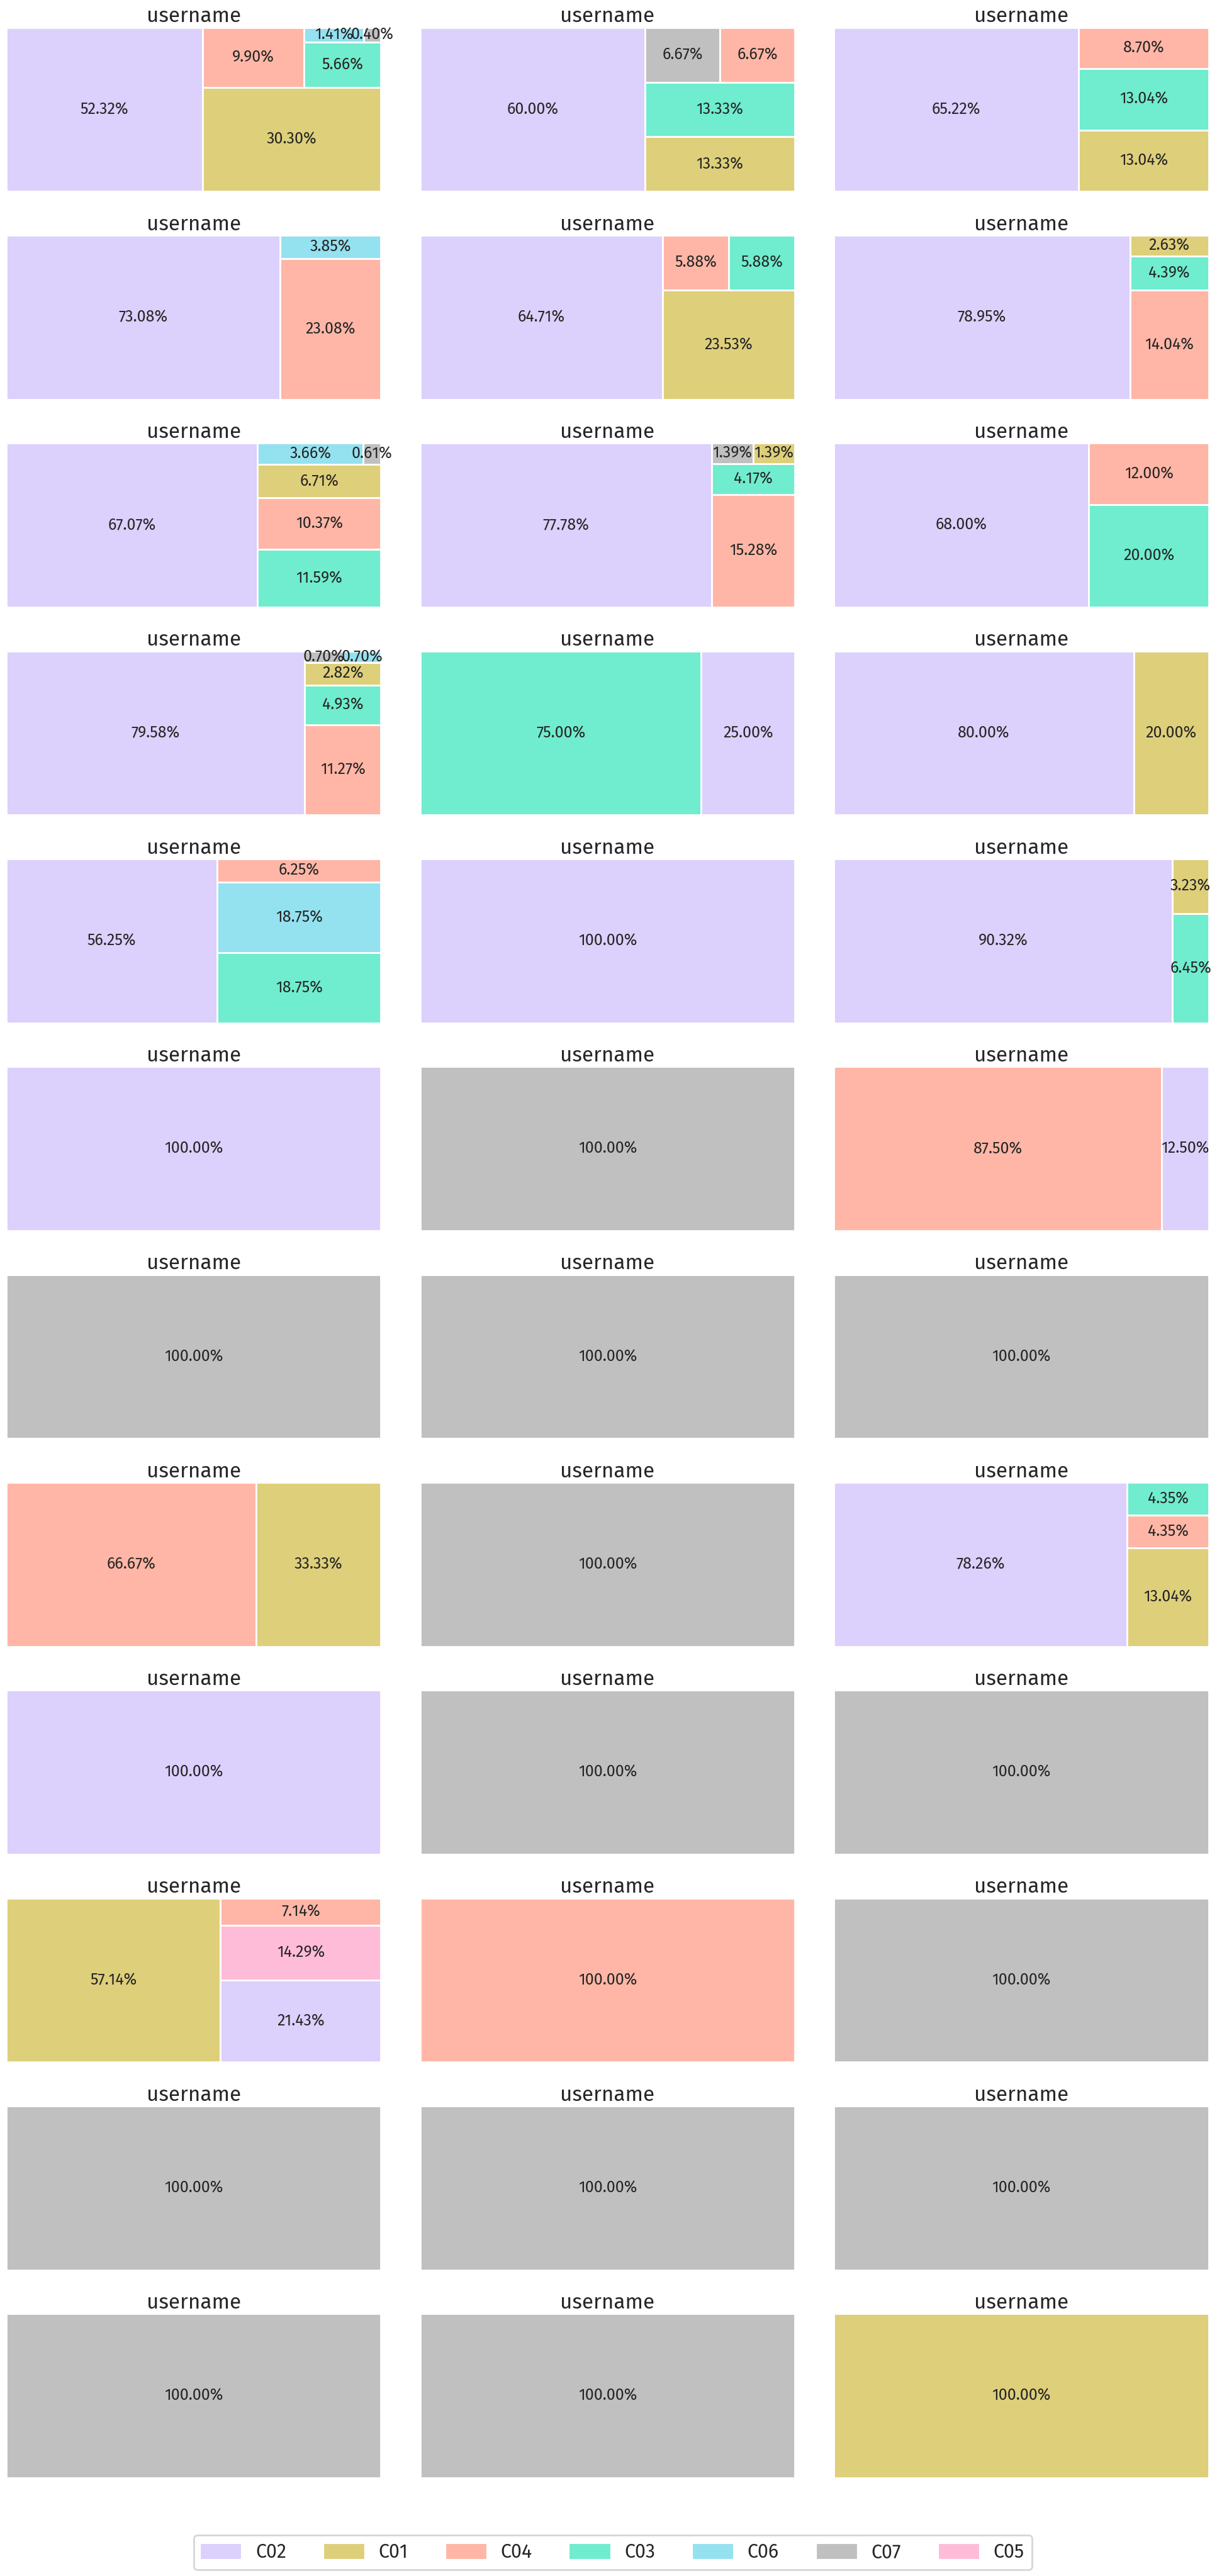

In [49]:
figure, axes = plt.subplots(12, 3, figsize=(20,40))
figure.subplots_adjust(hspace=0.5, wspace=0.8)
for idx, (he, ax) in enumerate(zip(hub_egoes, axes.flatten())):
    squarify.plot(ax=ax, sizes=hub_egoes[he]['ego_classes_percentage']['Percentage'], label=['{:.2f}%'.format(x) for x in hub_egoes[he]['ego_classes_percentage']['Percentage']], color=hub_egoes[he]['ego_classes_percentage']['Modularity Class'].map(new_col3), text_kwargs={'fontsize':18})
    #ax.set_title(hub_egoes[he]['screen_name']) # anonymized - uncomment this when running it
    ax.set_title("username") #comment this when running it to deanonymize
    ax.axis('off')
else:
    [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]

# Build the legend of present modularity classes
cp = []
for i in list_of_present_classes:
    if i in mc_10:
        cp.append(mpatches.Patch(color=new_col3[i], label=new_col2[i]))
figure.legend(handles=cp, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=10)

plt.tight_layout()
plt.savefig("png/community_position_identity_profile_label_all.png", dpi=300, bbox_inches='tight')
plt.savefig("svg/community_position_identity_profile_label_all.svg", bbox_inches='tight')